In [41]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
labelEnco = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

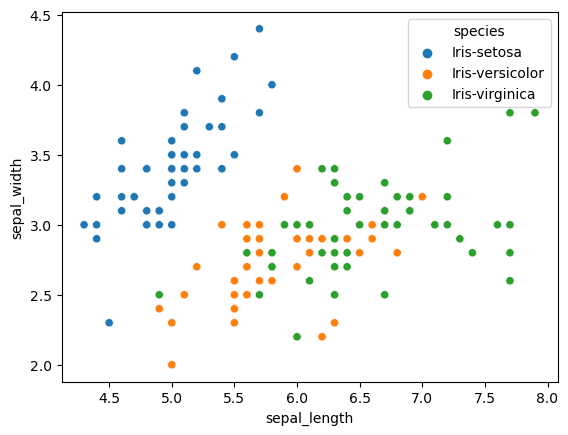

In [17]:
# distribution of species by sepals
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

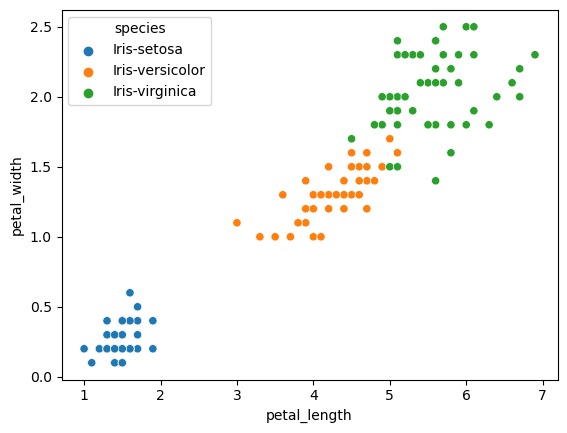

In [18]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")

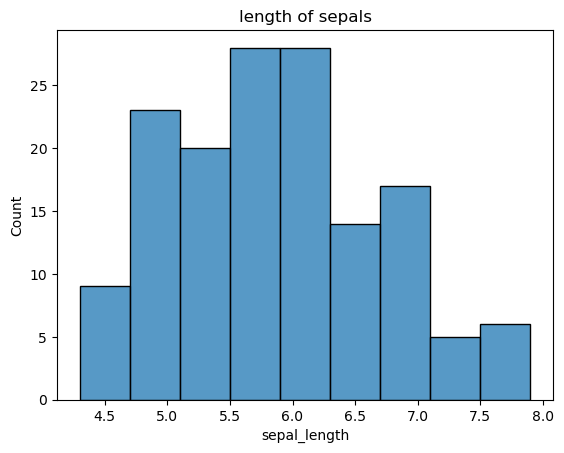

In [25]:
sns.histplot(data=df, x="sepal_length")
plt.title("length of sepals")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

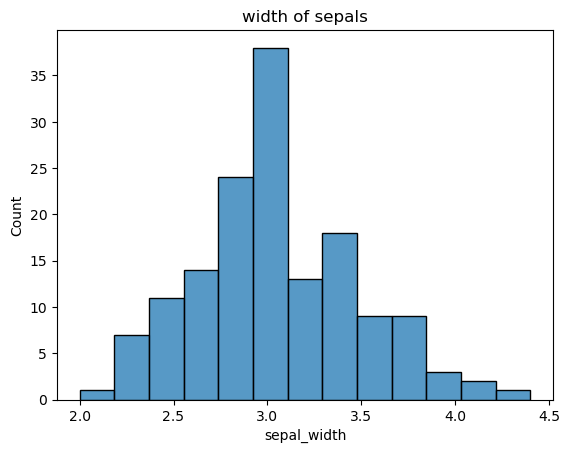

In [26]:
sns.histplot(data=df, x="sepal_width")
plt.title("width of sepals")
plt.show

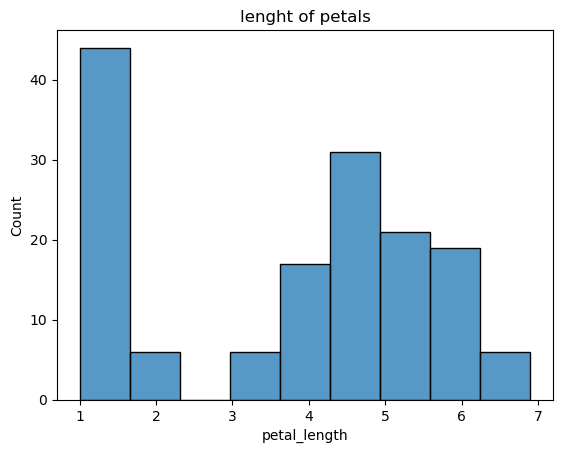

In [27]:
sns.histplot(data=df, x="petal_length")
plt.title("lenght of petals")
plt.show()

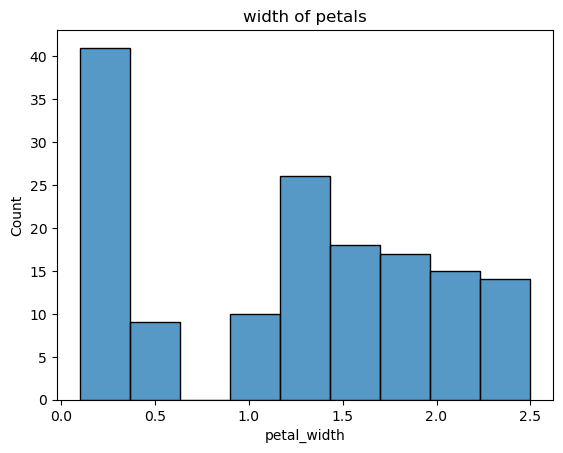

In [28]:
sns.histplot(data=df, x="petal_width")
plt.title("width of petals")
plt.show()

[Text(0.5, 1.0, 'sepal length')]

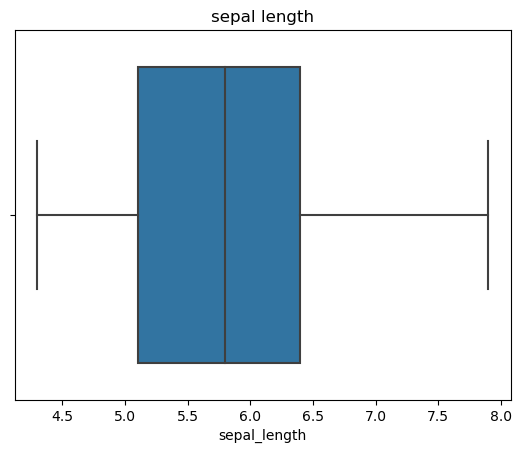

In [33]:
sns.boxplot(data=df, x="sepal_length").set(title = "sepal length")

[Text(0.5, 1.0, 'sepal width')]

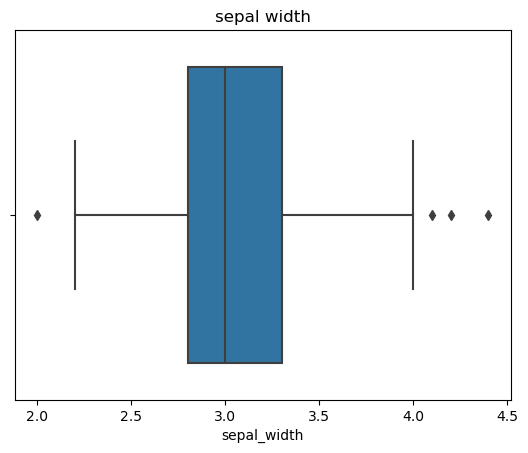

In [34]:
sns.boxplot(data=df, x="sepal_width").set(title = "sepal width")

[Text(0.5, 1.0, 'petal length')]

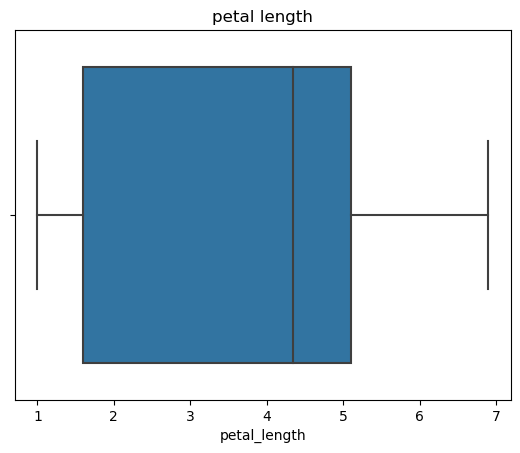

In [35]:
sns.boxplot(data=df, x="petal_length").set(title = "petal length")

[Text(0.5, 1.0, 'petal width')]

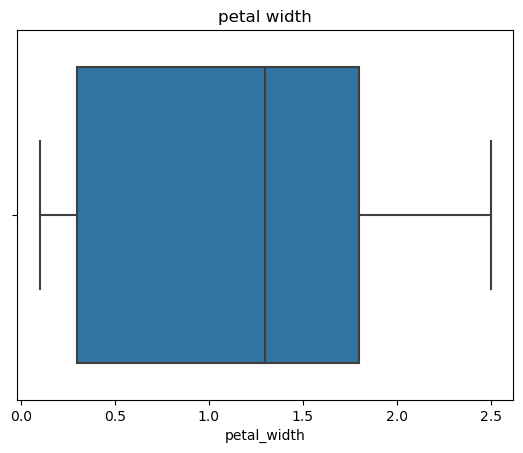

In [36]:
sns.boxplot(data=df, x="petal_width").set(title = "petal width")

In [37]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

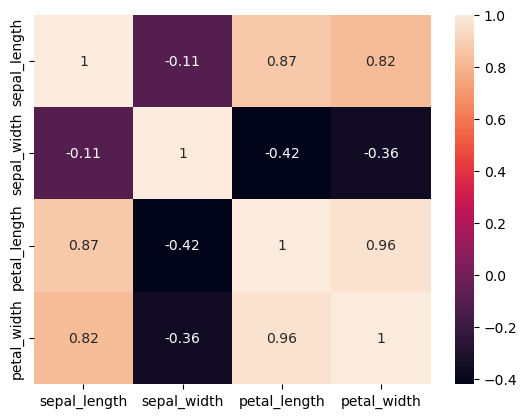

In [38]:
sns.heatmap(df.corr(), annot=True)

In [42]:
df['sepecies'] = labelEnco.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepecies
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [43]:
# generate 1000 out_df points randomly drawn from an exponential distribution
original_IRIS_df = np.random.exponential(size = 1000).reshape(-1, 1)

# Use Min Max Scaler for Scaling
scaler = MinMaxScaler()

#scale the out_df between 0 and 1
scaled_IRIS_df = scaler.fit_transform(original_IRIS_df)

C:\Users\HG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled IRIS_df')

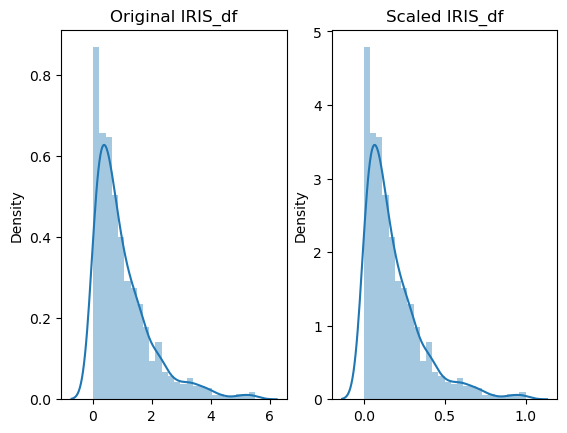

In [44]:
fig, ax=plt.subplots(1,2)
sns.distplot(original_IRIS_df, ax=ax[0])
ax[0].set_title("Original IRIS_df")
sns.distplot(scaled_IRIS_df, ax=ax[1])
ax[1].set_title("Scaled IRIS_df")

In [45]:
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species,sepecies
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [46]:
# Split Data into Train and Test.

x = df.drop(columns = ['species'])
y = df['species']


x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.50)

In [47]:
#model training using Logistic Regression
model = LogisticRegression()

In [48]:
model.fit(x_train , y_train)

LogisticRegression()

In [49]:
print("The Accuracy of The model = " , model.score(x_test , y_test) * 100 , "%")

The Accuracy of The model =  100.0 %


In [64]:
#model training using knn
model = KNeighborsClassifier()

In [65]:
model.fit(x_train , y_train)

KNeighborsClassifier()

In [66]:
print("The Accuracy of the model = " , model.score(x_test, y_test)*100 , "%")

The Accuracy of the model =  100.0 %


C:\Users\HG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [69]:
#model training using decision tree
model = DecisionTreeClassifier()


In [70]:
model.fit(x_train , y_train)

DecisionTreeClassifier()

In [71]:
print("The Accuracy of the model = " , model.score(x_test, y_test)*100 , "%")

The Accuracy of the model =  100.0 %
